In [1]:
#importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/sasha/Desktop/DATASCIENCE/2023/Mini-Project/data.nosync/cleaned_FULL_data.csv')
customers = pd.read_csv('/Users/sasha/Desktop/DATASCIENCE/2023/Mini-Project/data.nosync/cleaned_CUSTOMERS_data.csv')
income = pd.read_csv('/Users/sasha/Desktop/DATASCIENCE/2023/Mini-Project/data.nosync/income_predicted.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis =1)
df.head()

,from_account,money_amount,to_account,date,transaction_ID,Categorised,type_
0,NaN,4.00,CINEMA,2025-01-01,0,Cinema,Normal
1,40544.0,4.60,A_LOCAL_COFFEE_SHOP,2025-01-01,1,Coffee shop,Normal
2,88339.0,2.40,40544,2025-01-01,2,betweeen,betweeen
3,85149.0,4.65,A_LOCAL_COFFEE_SHOP,2025-01-01,3,Coffee shop,Normal
4,18555.0,2.40,85149,2025-01-01,4,betweeen,betweeen


In [4]:
customers = customers.drop(['Unnamed: 0'], axis =1)
customers.head()

,min,max,mean,sum,count,mode,customer_ID
0,1.45,1960.00,14.853905,37565.525305,2529,A_LOCAL_COFFEE_SHOP,1
1,1.45,299.00,14.959220,15527.670740,1038,PUB,100002
2,1.45,1955.00,33.762143,22924.494825,679,LOCAL_WATERING_HOLE,100019
3,1.45,381.25,22.950110,15927.376375,694,6053,100027
4,1.45,302.50,10.571419,13415.130350,1269,COFFEE_SHOP,10004


In [5]:
income = income.drop(['Unnamed: 0', 'After_tax'], axis =1)
income = income.rename(columns={'from_account':'customer_ID'})
income['customer_ID'] = income['customer_ID'].astype(int)
income.head()

,customer_ID,Inferior,Normal,x,Percentile,Before_tax
0,1,511.756790,17761.593923,36034.944637,99,183000
1,21,950.224367,20161.972033,41274.168433,99,183000
2,45,215.681159,19175.864958,38567.411075,99,183000
3,53,991.650924,17966.606913,36924.864750,99,183000
4,64,201.513333,15282.259502,30766.032338,99,183000


In [6]:
customers = pd.merge(customers, income)
customers.head()


,min,max,mean,sum,count,mode,customer_ID,Inferior,Normal,x,Percentile,Before_tax
0,1.45,1960.00,14.853905,37565.525305,2529,A_LOCAL_COFFEE_SHOP,1,511.756790,17761.593923,36034.944637,99,183000
1,1.45,299.00,14.959220,15527.670740,1038,PUB,100002,732.759653,11355.081087,23442.921827,88,54600
2,1.45,1955.00,33.762143,22924.494825,679,LOCAL_WATERING_HOLE,100019,100.985526,9866.321521,19833.628569,66,33600
3,1.45,381.25,22.950110,15927.376375,694,6053,100027,145.800000,11058.403875,22262.607750,83,47600
4,1.45,302.50,10.571419,13415.130350,1269,COFFEE_SHOP,10004,247.950000,8850.199822,17948.349644,48,25600


In [7]:
df['dayOfWeek'] = pd.to_datetime(df['date']).dt.day_name()
df['Weekday'] = df['dayOfWeek'].map(lambda x: 1 if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']  else 0)
df = df.drop(columns=['dayOfWeek'])
df = pd.concat([df.drop('Categorised', 1), pd.get_dummies(df.Categorised).mul(1)], axis=1)
df = pd.concat([df.drop('type_', 1), pd.get_dummies(df.type_).mul(1)], axis=1)
df = df.rename(columns={'from_account':'customer_ID'})
df = df.dropna(subset=['customer_ID'])
df['customer_ID'] = df['customer_ID'].astype(int)
df = pd.merge(df,customers[['customer_ID', 'Before_tax']])


/var/folders/py/d721tqvn39xbrq83g84j15pm0000gn/T/ipykernel_6494/3394246744.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = pd.concat([df.drop('Categorised', 1), pd.get_dummies(df.Categorised).mul(1)], axis=1)
/var/folders/py/d721tqvn39xbrq83g84j15pm0000gn/T/ipykernel_6494/3394246744.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = pd.concat([df.drop('type_', 1), pd.get_dummies(df.type_).mul(1)], axis=1)


In [9]:
df_pca  = df.loc[:, ~df.columns.isin(['customer_ID', 'to_account', 'date', 'transaction_ID'])]
del df

In [15]:
from numpy import linalg as LA
data = df_pca.to_numpy()
ncols = data.shape[1]

X = data[:,0:ncols-1]
label = data[:,ncols-1]

Sigma = np.cov(X.T)


eval, evec = LA.eig(Sigma)

print (eval)


[ 7.35326129e+03  6.03939014e-01  3.31071526e-01  1.92831704e-01
  1.35577330e-01  7.05834282e-02  4.93534105e-02  4.27376088e-02
  3.11548939e-02  2.31476984e-02  1.22239436e-02  1.08160030e-02
  9.12198682e-03  7.14473268e-03  6.29605051e-03  4.33982362e-03
  3.58818498e-03  3.50298247e-03  3.02820249e-03  1.81386654e-03
  1.59686398e-03  1.52322090e-03  1.54024383e-03  1.14437238e-03
  1.05977156e-03  6.82687795e-04  4.41815057e-04  3.46221020e-04
  2.55961282e-05 -2.10381460e-15  1.12778197e-18]


Sorted eigenvalues [ 7.35326129e+03  6.03939014e-01  3.31071526e-01  1.92831704e-01
  1.35577330e-01  7.05834282e-02  4.93534105e-02  4.27376088e-02
  3.11548939e-02  2.31476984e-02  1.22239436e-02  1.08160030e-02
  9.12198682e-03  7.14473268e-03  6.29605051e-03  4.33982362e-03
  3.58818498e-03  3.50298247e-03  3.02820249e-03  1.81386654e-03
  1.59686398e-03  1.54024383e-03  1.52322090e-03  1.14437238e-03
  1.05977156e-03  6.82687795e-04  4.41815057e-04  3.46221020e-04
  2.55961282e-05  1.12778197e-18 -2.10381460e-15]
[7353.26129198 7353.86523099 7354.19630252 7354.38913422 7354.52471155
 7354.59529498 7354.64464839 7354.687386   7354.7185409  7354.74168859
 7354.75391254 7354.76472854 7354.77385053 7354.78099526 7354.78729131
 7354.79163113 7354.79521932 7354.7987223  7354.8017505  7354.80356437
 7354.80516124 7354.80670148 7354.8082247  7354.80936907 7354.81042884
 7354.81111153 7354.81155335 7354.81189957 7354.81192516 7354.81192516
 7354.81192516]


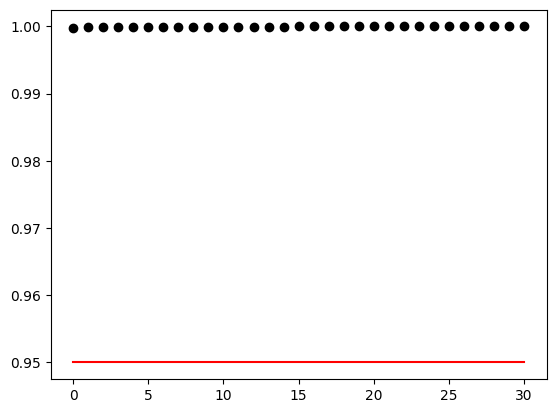

In [17]:
#Sort the eigenvalues - should also reorder the eigenvectors if applying them
sorted_eval = np.sort(eval)
eval = sorted_eval[::-1]  # reverse the order so that it is decreasing
print("Sorted eigenvalues " + str(eval))
cumuleval = np.cumsum(eval)
print(cumuleval)
total = np.sum(eval)
cumuleval = cumuleval/total

# Plot cumulative sum of eigenvalues with a threshold at 0.95
plt.figure(3)
plt.plot(cumuleval, 'ok')
xvals = range(data.shape[1] - 1)
plt.plot(xvals, 0.95*np.ones(np.shape(eval)), 'r-')
plt.show()

Explained variance ratio [9.99992956e-01 7.04281086e-06 5.78084527e-10]


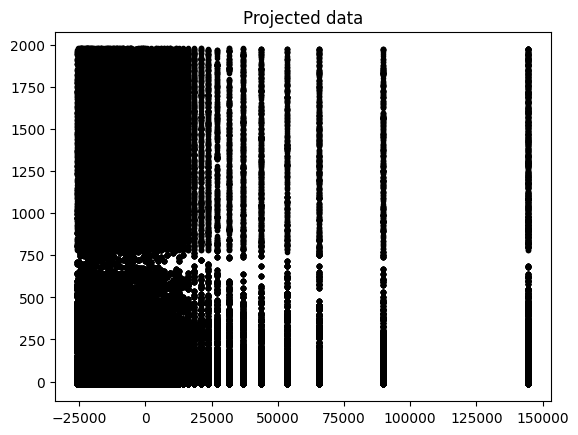

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df_pca)
# This should equal the sum of the first two values in the cumulative proportion plot
print('Explained variance ratio '+ str(pca.explained_variance_ratio_))

# Project data onto first two principal components
projX = pca.transform(df_pca)
plt.figure(4)
plt.plot(projX[:,0], projX[:,1], 'k.')
plt.title('Projected data')
plt.show()

In [11]:
#customers.to_csv('/Users/sasha/Desktop/DATASCIENCE/2023/Mini-Project/data.nosync/CUSTOMERS_data_forVis.csv')

In [12]:
#df.to_csv('/Users/sasha/Desktop/DATASCIENCE/2023/Mini-Project/data.nosync/main_data_forVis.csv')